**MRF Results: Cases**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from itertools import product
import warnings
warnings.filterwarnings("ignore")

In [2]:
combined = pd.read_csv("/Data/Combined_Dataset.csv")

In [3]:
vi = pd.read_csv("VI_oob.csv", index_col="Unnamed: 0")

In [4]:
VI =vi.sort_values(by = "mrf.output$VI_oob", ascending = False)

In [5]:
VI

,mrf.output$VI_oob,column_names
5,0.121655,delta_cases_per_capita_United_Kingdom
20,0.112945,trend
11,0.111466,full_lockdown
10,0.111443,delta_deaths_per_capita_France
14,0.109386,max_tp
16,0.108526,rain
12,0.107611,full_lockdown.l30
4,0.106553,log_new_people_vaccinated_per_capita
9,0.106446,delta_cases_per_capita_France
8,0.106108,delta_deaths_per_capita_Germany


In [6]:
for idx in VI.index:
    if "delta" in VI.loc[idx, 'column_names']:
        VI.loc[idx, 'column_names'] = VI.loc[idx, 'column_names'].replace("delta", 'new')
    if "United_Kingdom" in VI.loc[idx, 'column_names']:
        VI.loc[idx, 'column_names'] = VI.loc[idx, 'column_names'].replace("United_Kingdom", 'UK')
    
    if "United.Kingdom" in VI.loc[idx, 'column_names']:
        VI.loc[idx, 'column_names'] = VI.loc[idx, 'column_names'].replace("United.Kingdom", 'UK')

Text(0.5, 1.0, 'MacroRandomForest variable importance measures based on out-of-bag prediction error for predicting cases')

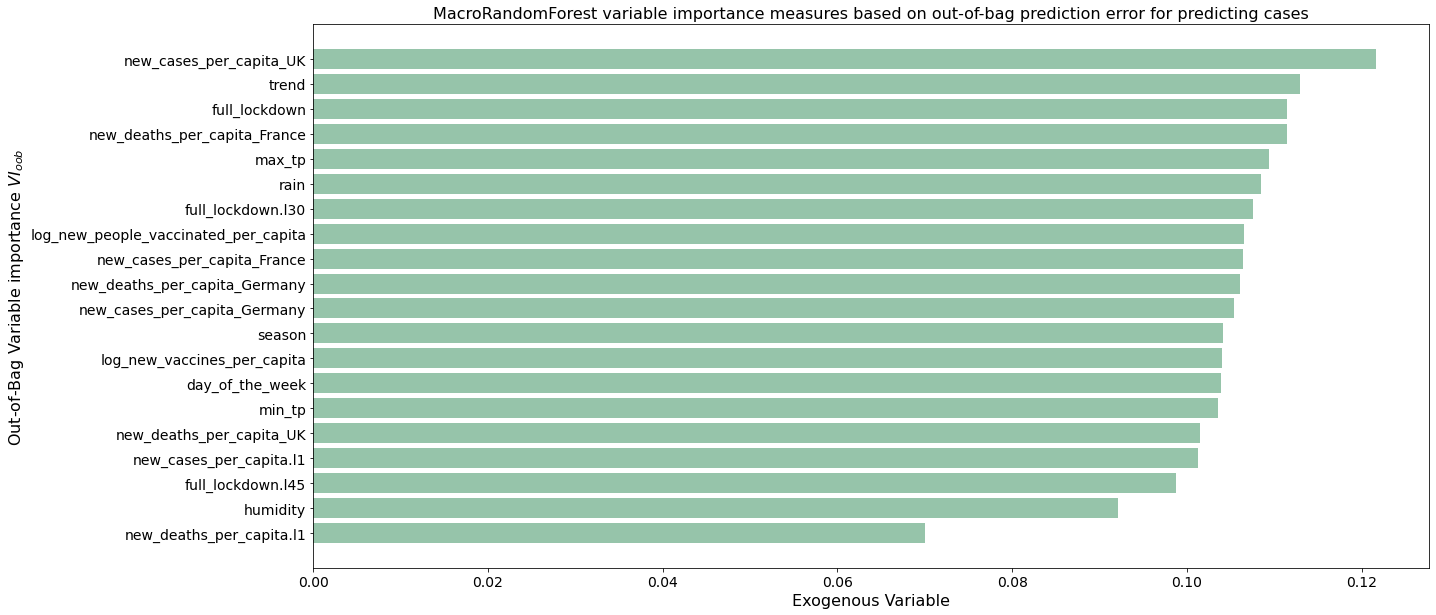

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.barh(VI['column_names'][::-1], width = VI['mrf.output$VI_oob'][::-1], color = 'seagreen', alpha = 0.5)
ax.tick_params(which = 'both', labelsize = 14)

ax.set_ylabel(r"Out-of-Bag Variable importance $VI_{oob}$", fontsize = 16)
ax.set_xlabel(r"Exogenous Variable", fontsize = 16)
ax.set_title("MacroRandomForest variable importance measures based on out-of-bag prediction error for predicting cases", fontsize =  16)